In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# 1. Get the numerical variables from our dataset
data_num=data.select_dtypes(include = np.number)

In [4]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution
def plot_numerical (df):
    for column in df.columns:
        sns.displot(df[column])
        plt.xticks(rotation=90)
        plt.show()

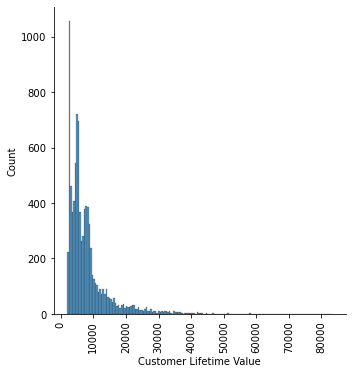

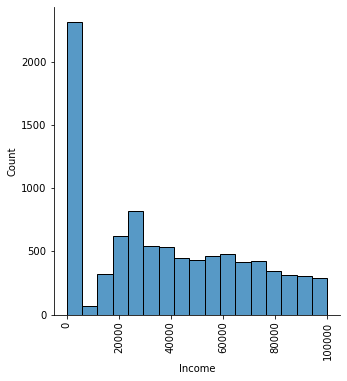

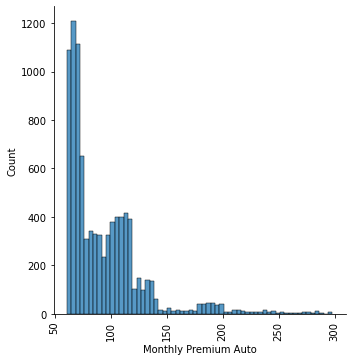

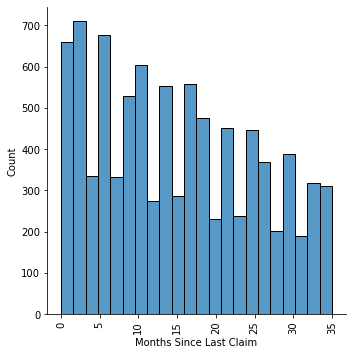

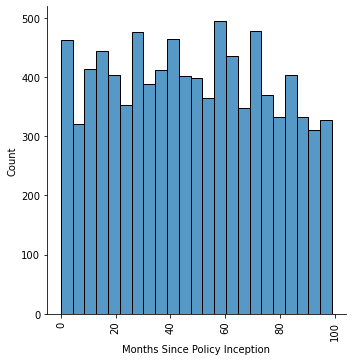

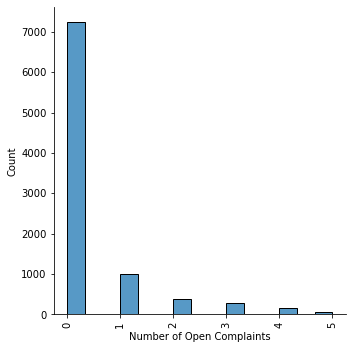

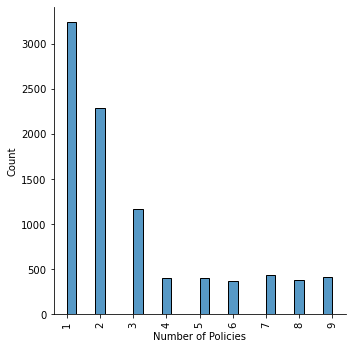

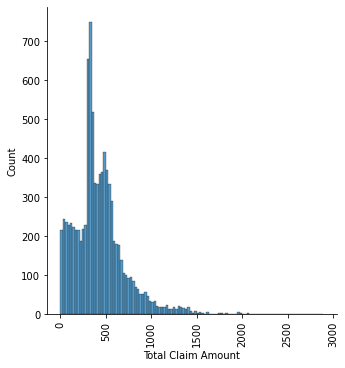

In [5]:
plot_numerical (data_num)

In [6]:
# 'Customer Lifetime Value' seems to fit with the exponential (Poisson) distribution
# 'Income'. Removing the zeros (probably representing unknown incomes), seems to fit with the exponential (Poisson) distribution
# 'Monthly Premium Auto'seems to fit with the exponential distribution
# 'Months Since Last Claim'. None of them
# 'Months Since Policy Inception'. None of them.
# 'Number of Open Complaints' seems to fit with the exponential distribution
# 'Number of Policies' seems to fit with the exponential distribution
# 'Total Claim Amount' seems to fit with the exponential (Poisson) distribution

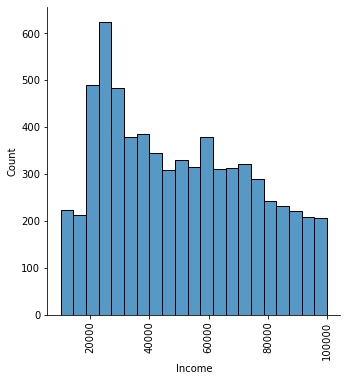

In [7]:
# Plot for 'income' removing zero income
data_income=data[data['Income']>0]
sns.displot(data_income['Income'])
plt.xticks(rotation=90)
plt.show()

In [8]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result
#3.1 log-transform
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [9]:
def to_log (df):
    for column in df.columns:
        df[column]=df[column].apply(lambda x :log_transfom_clean1(x))
    return df

In [10]:
data_log=data_num.copy()
data_log=to_log (data_log)

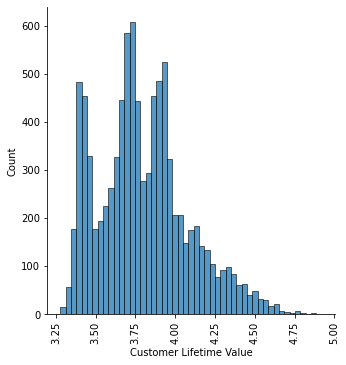

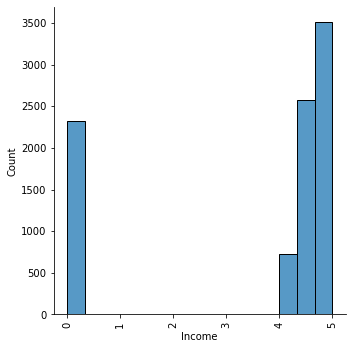

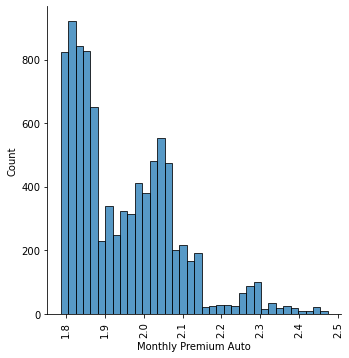

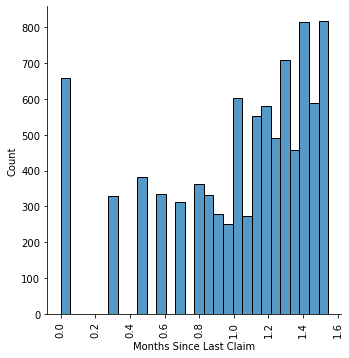

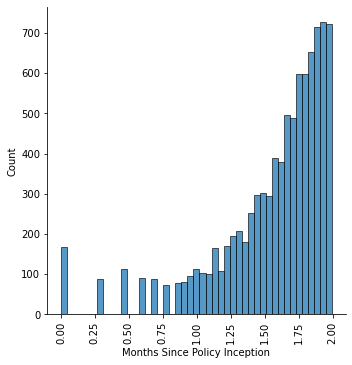

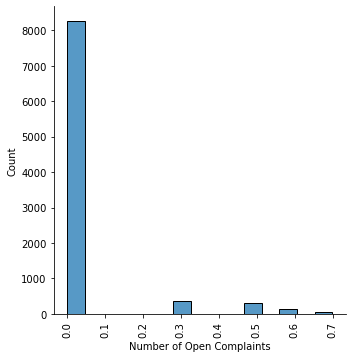

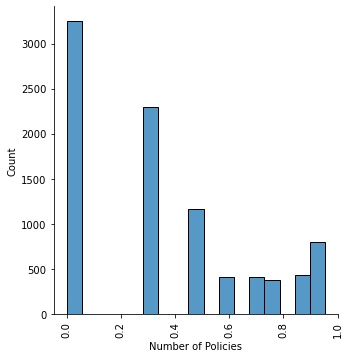

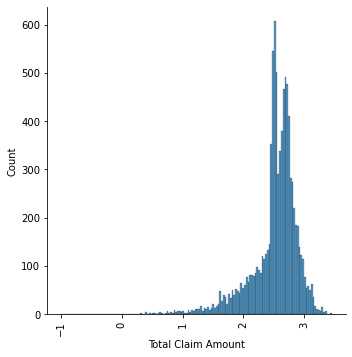

In [11]:
plot_numerical (data_log)

In [12]:
# Log-transform changes completely the shape of the variables. Now:
# 'Customer Lifetime Value' and 'Total Claim Amount' seems to fit with the exponential (Poisson) distribution

In [13]:
#3.2 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(data_num)
data_normalized = transformer.transform(data_num)
data_normalized=pd.DataFrame(data_normalized, columns=data_num.columns)

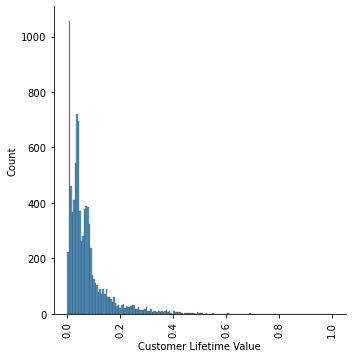

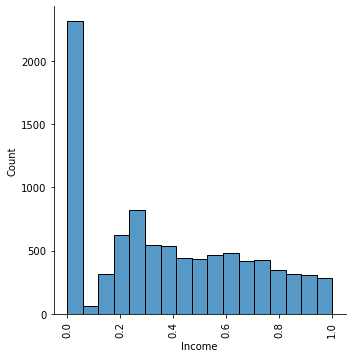

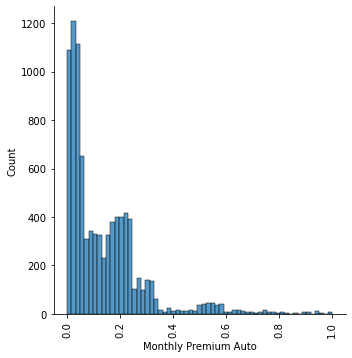

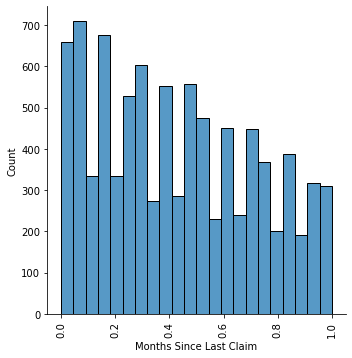

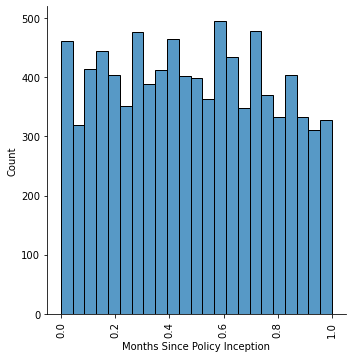

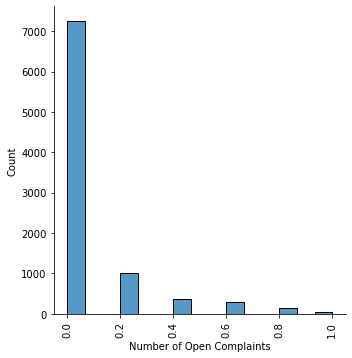

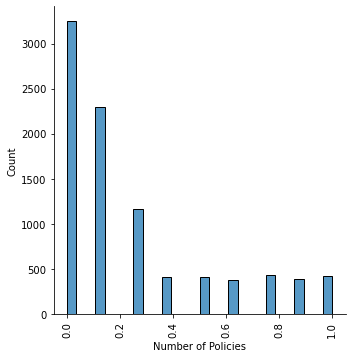

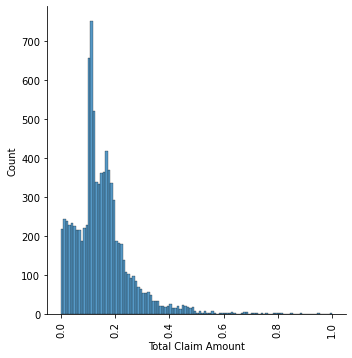

In [15]:
plot_numerical (data_normalized)

In [ ]:
# Using MinMaxScaler, data's shape doesn't change, as expected

In [16]:
#3.3 StandardScaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_num)
data_standardized = transformer.transform(data_num)
data_standardized=pd.DataFrame(data_standardized, columns=data_num.columns)

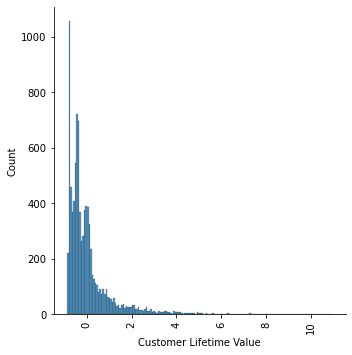

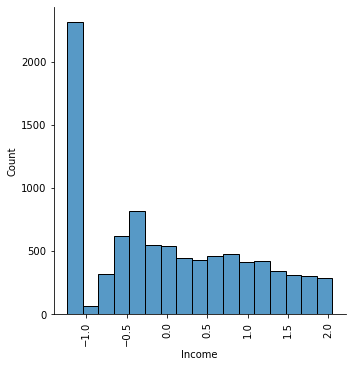

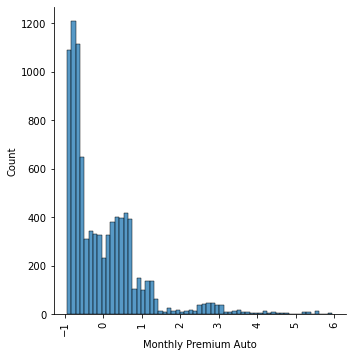

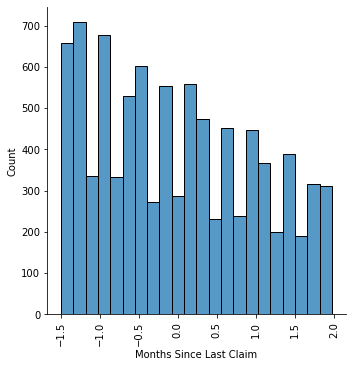

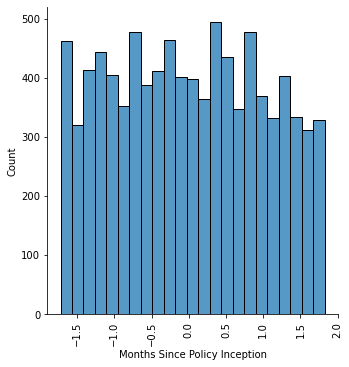

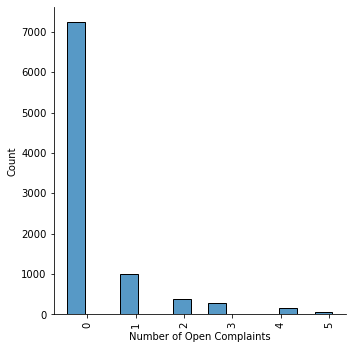

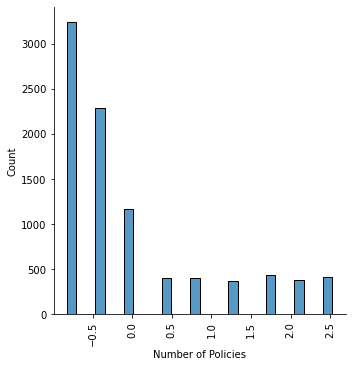

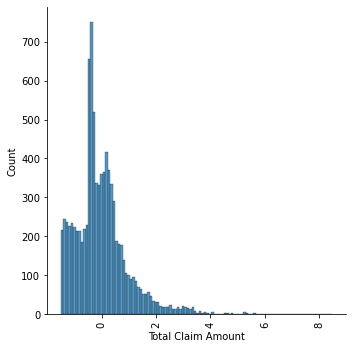

In [18]:
plot_numerical (data_standardized)

In [ ]:
# Using StandardScaler, again data's shape doesn't change